In [ ]:
def P(S,A, W_S={'strawb': 0.5, 'blueb': 0.25, 'cin': 0.25}):
    '''
    basic function to calculate probability of selecting from sample S if it belongs to the population A. 
    P(simultaneous_events) = p(1)*p(2)*p(3)
    '''
    # W_S is the prevalence within the distribution, normalized.
    
    if set(A).issubset(set(S)):
        if W_S is not None:
            return len(A)/len(S)
        else:
            return len(A)/len(S)
    else:
        return 0
A= set(['strawb'])
S = set(['strawb','blueb','cin'])
P(S,A)

In [ ]:
!pip install preliz

In [ ]:
pip install numpy pymc3 arviz matplotlib


In [16]:
import numpy as np
import pymc3 as pm
import arviz as az
import matplotlib.pyplot as plt

# Expected counts for 3:2:1 ratio
expected_counts = np.array([1, 1, 1])
# Dirichlet prior parameters based on expected counts
alpha = expected_counts

# Observed synthetic stroke counts for 3 brain regions
stroke_counts = np.array([90, 50, 40])
total_strokes = np.sum(stroke_counts)
num_regions = len(stroke_counts)

with pm.Model() as model:
    # Dirichlet prior (theta)
    theta = pm.Dirichlet('theta', a=alpha)
    
    # Likelihood (y|theta)
    y = pm.Multinomial('y', n=total_strokes, p=theta, observed=stroke_counts)
    
    # p(y) is undefined here as it is calculated during pm.Model's call. 
    # Use the defined model to fine-tune the posterior P(theta | y) via pm.sample
    trace = pm.sample(2000, tune=1000, return_inferencedata=True)


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [theta]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 17 seconds.


In [17]:
# Get the statistical properties of the posterior
# hdi (highest density interval) interval is the 94% probability that the true value is actually within that interval (the 94% credibility interval)
# credible interval widens based on the inerse sample size of the observed values, NOT the model. 
summary = az.summary(trace, kind='stats')
display(summary)

,mean,sd,hdi_3%,hdi_97%
theta[0],0.497,0.037,0.431,0.569
theta[1],0.278,0.033,0.215,0.340
theta[2],0.225,0.030,0.167,0.282


array([[<AxesSubplot: title={'center': 'theta'}>,
        <AxesSubplot: title={'center': 'theta'}>]], dtype=object)

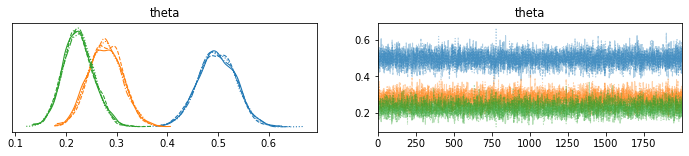

In [18]:
# visualize the posteriors
az.plot_trace(trace)